23.03 Confirm Homography transition 

## Predict coordinates of wells using 384 well plate class

In [1]:
save_dir = "/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures"

### Try 2: Linear spacing with 3 corners and RANSAC homography

search for root_dir and set working directory
Working directory set to: /media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation
/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation
search for root_dir and set working directory
Working directory set to: /media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation
4.509090909166667
20.29090909125
x and y step: 4.875 and 4.5
Ymin -38.9 and Ymax 33.1
Xmin -53.5 and Xmax 63.5
[59.4, 33.8] [-47.7, 33.1] [-47.7, -38.6]
1. Getting all four corner wells coordinates as vectors
Learning the homography matrix using non-linear to map from well plate row and column arrangement to xzy-stage coordinate space
2. Computing coordinate space from well corners using Linear spacing
Saving all variables associated to the coordinate system.
4.509090909166667
20.29090909125


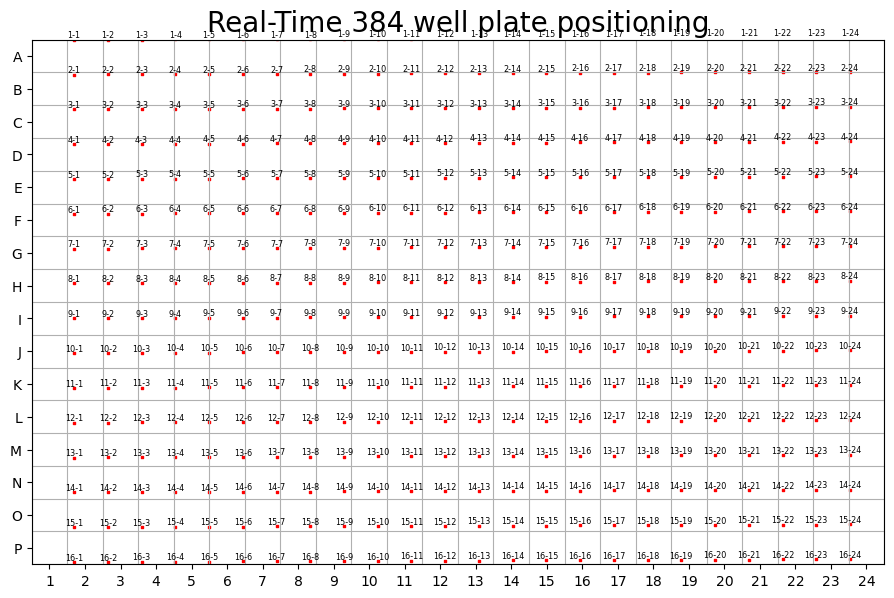

In [2]:
# Now visualise on coordinate plot method from publication
import notebooks.plot_visualizer as pv
WellPlate = pv.initwellplate()
axis, tr, tl, bl, r_n, c_n, mid_point, vector_1, vector_2 = pv.create_plot()
print(tr, tl, bl)
import matplotlib.pyplot as plt
WellPlate.predict_well_coords(c_n, r_n, algorithm=WellPlate.coordinate_frame_algorithms[0], algorithm_H="non-linear", homography_source_coordinates=WellPlate.homography_source_coordinates)
vectors, wellnames, length, height, x_spacing, y_spacing = WellPlate.mapwell2xyzstagecoords(c_n, r_n)



### Get normalized length and height of axis
# Scaling factor of y and x 
transform = ((404.43636364-79.78181818)/72)
well_h= 4.5
print(transform)
#Pixels
well_h_pixels = (well_h * transform) 
#Points
p = 72/100
print(well_h_pixels)
#s
s = (well_h_pixels*p)**2
y_offset = (2/16)
x_offset = (2/24)
fov = 250*10**(-6) * 1024 #height
s = (fov*p)**2

for vector, wellname in zip(vectors, wellnames):
    #print("Well name {} and its coordinate: {}".format(wellname, vector))
    x,y,_ = vector
    axis.text(x, y, wellname, ha='center', va='bottom',fontsize="xx-small")
    axis.scatter(x,y, c="r", s=s*100, marker=",")
    
plt.show()

### Try 3: Homography estimated using SVD

In [1]:
# Now visualise on coordinate plot method from publication
import  notebooks.plot_visualizer as pv
WellPlate = pv.initwellplate()
axis, tr, tl, bl, r_n, c_n, mid_point, vector_1, vector_2 = pv.create_plot()
import matplotlib.pyplot as plt
WellPlate.predict_well_coords(c_n, r_n, algorithm=WellPlate.coordinate_frame_algorithms[0], algorithm_H="SVD", homography_source_coordinates=WellPlate.homography_source_coordinates)
vectors, wellnames, length, height, x_spacing, y_spacing = WellPlate.mapwell2xyzstagecoords(c_n, r_n)

### Get normalized length and height of axis
# Scaling factor of y and x 
transform = ((404.43636364-79.78181818)/72)
well_h= 4.5
print(transform)
#Pixels
well_h_pixels = (well_h * transform) 
#Points
p = 72/100
print(well_h_pixels)
#s
s = (well_h_pixels*p)**2
y_offset = (2/16)
x_offset = (2/24)
fov = 250*10**(-6) * 1024 #height_
s = (fov*p)**2


for vector, wellname in zip(vectors, wellnames):
    #print("Well name {} and its coordinate: {}".format(wellname, vector))
    x,y,_ = vector
    axis.text(x, y, wellname, ha='center', va='bottom',fontsize="xx-small")
    axis.scatter(x,y, c="r", s=s*100, marker=",")
    
plt.show()

ModuleNotFoundError: No module named 'notebooks'

### Try 5: Eigendecomposition Homography

4.509090909166667
20.29090909125
x and y step: 4.583333333333333 and 4.5625
Ymin -39.0 and Ymax 34.0
Xmin -50.0 and Xmax 60.0
1. Getting all four corner wells coordinates as vectors
Learning the homography matrix using Eigendecomposition to map from well plate row and column arrangement to xzy-stage coordinate space
2. Computing coordinate space from well corners using Homography
Saving all variables associated to the coordinate system.
4.509090909166667
20.29090909125


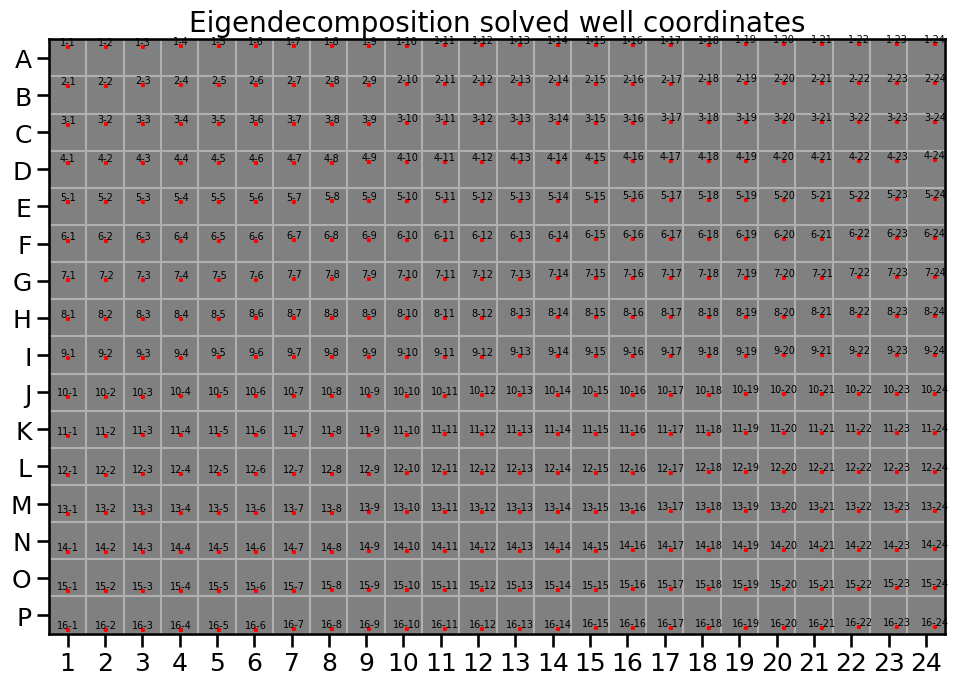

In [327]:
# Now visualise on coordinate plot method from publication
import os
import seaborn as sns

sns.set_context("talk")
title = "Eigendecomposition solved well coordinates"
# Now visualise on coordinate plot method from publication
import plot_visualizer as pv
WellPlate = pv.initwellplate()
axis, tr, tl, bl, r_n, c_n, mid_point , vector_1, vector_2= pv.create_plot(title=title)
import matplotlib.pyplot as plt
WellPlate.predict_well_coords(c_n, r_n, algorithm=WellPlate.coordinate_frame_algorithms[1], algorithm_H="Eigendecomposition", homography_source_coordinates=WellPlate.homography_source_coordinates)
vectors, wellnames, length, height, x_spacing, y_spacing = WellPlate.mapwell2xyzstagecoords(c_n, r_n)

transform = ((404.43636364-79.78181818)/72)
well_h= 4.5
print(transform)
#Pixels
well_h_pixels = (well_h * transform) 
#Points
p = 72/100
print(well_h_pixels)
#s
s = (well_h_pixels*p)**2

fov = 250*10**(-6) * 1024 #height
s = (fov*p)**2


for vector, wellname in zip(vectors, wellnames):
    #print("Well name {} and its coordinate: {}".format(wellname, vector))
    x,y,_ = vector
    axis.scatter(x,y, c="r", s=s*100, marker=",")
    axis.text(x, y, wellname, ha='center', va='bottom',fontsize=7)

axis.set_facecolor('grey')
plt.tight_layout()



#plt.savefig(os.path.join(save_dir, "{}.png".format(title)))
#plt.show()







# Perspective transformation with 5mm displacement in x and y axis of well plate in xyz coordinates

In [ ]:
# Now visualise on coordinate plot method from publication
import  notebooks.plot_visualizer as pv
WellPlate = pv.initwellplate()
axis, tr, tl, bl, r_n, c_n, vector_1, vector_2 = pv.create_plot(xmin=-50-5, 
    xmax=60-5,
    ymin=-40-5,
    ymax= 34-5)
import matplotlib.pyplot as plt
WellPlate.predict_well_coords(c_n, r_n, algorithm=WellPlate.coordinate_frame_algorithms[0], algorithm_H="Eigendecomposition", homography_source_coordinates=WellPlate.homography_source_coordinates)
vectors, wellnames, length, height, x_spacing, y_spacing = WellPlate.mapwell2xyzstagecoords(c_n, r_n)

### Get normalized length and height of axis
# Scaling factor of y and x 
transform = ((404.43636364-79.78181818)/72)
well_h= 4.5
print(transform)
#Pixels
well_h_pixels = (well_h * transform) 
#Points
p = 72/100
print(well_h_pixels)
#s
s = (well_h_pixels*p)**2
y_offset = (2/16)
x_offset = (2/24)
fov = 250*10**(-6) * 1024 #height
s = (fov*p)**2
    

for vector, wellname in zip(vectors, wellnames):
    #print("Well name {} and its coordinate: {}".format(wellname, vector))
    x,y,_ = vector
    axis.scatter(x,y, c="r", s=s*100, marker=",")
    axis.text(x, y, wellname, ha='center', va='bottom',fontsize="xx-small")

plt.tight_layout()
plt.show()

## With fixit to correct for displacement

In [ ]:
from DragonFlyWellPlateAutomation.devices.CoordinateTransforms import homography_fixit
# Now visualise on coordinate plot method from publication
import  notebooks.plot_visualizer as pv
WellPlate = pv.initwellplate()
axis, tr, tl, bl, r_n, c_n, mid_point, vector_1,vector_2  = pv.create_plot(xmin=-50-5, 
    xmax=60-5,
    ymin=-40-5,
    ymax= 34-5)
import matplotlib.pyplot as plt
WellPlate.predict_well_coords(c_n, r_n, algorithm=WellPlate.coordinate_frame_algorithms[0], algorithm_H="Eigendecomposition", homography_source_coordinates=WellPlate.homography_source_coordinates)
vectors, wellnames, length, height, x_spacing, y_spacing = WellPlate.mapwell2xyzstagecoords(c_n, r_n)


### Get normalized length and height of axis
# Scaling factor of y and x 
transform = ((404.43636364-79.78181818)/72)
well_h= 4.5
print(transform)
#Pixels
well_h_pixels = (well_h * transform) 
#Points
p = 72/100
print(well_h_pixels)
#s
s = (well_h_pixels*p)**2
y_offset = (2/16)
x_offset = (2/24)
fov = 250*10**(-6) * 1024 #height
s = (fov*p)**2
    


vectors = homography_fixit(( vectors[-1] - [4.8, 4.4, 0])[:2], vectors[-1], vectors.reshape(r_n, c_n, 3)).reshape(r_n * c_n, 3)


for vector, wellname in zip(vectors, wellnames):
    #print("Well name {} and its coordinate: {}".format(wellname, vector))
    x,y,_ = vector
    axis.scatter(x,y, c="r", s=s*100, marker=",")
    axis.text(x, y, wellname, ha='center', va='bottom',fontsize="xx-small")

plt.tight_layout()
plt.show()

# Obtain Spacing of projective transform 27.03

4.509090909166667
20.29090909125
x and y step: 4.583333333333333 and 4.5625
Ymin -39.0 and Ymax 34.0
Xmin -50.0 and Xmax 60.0


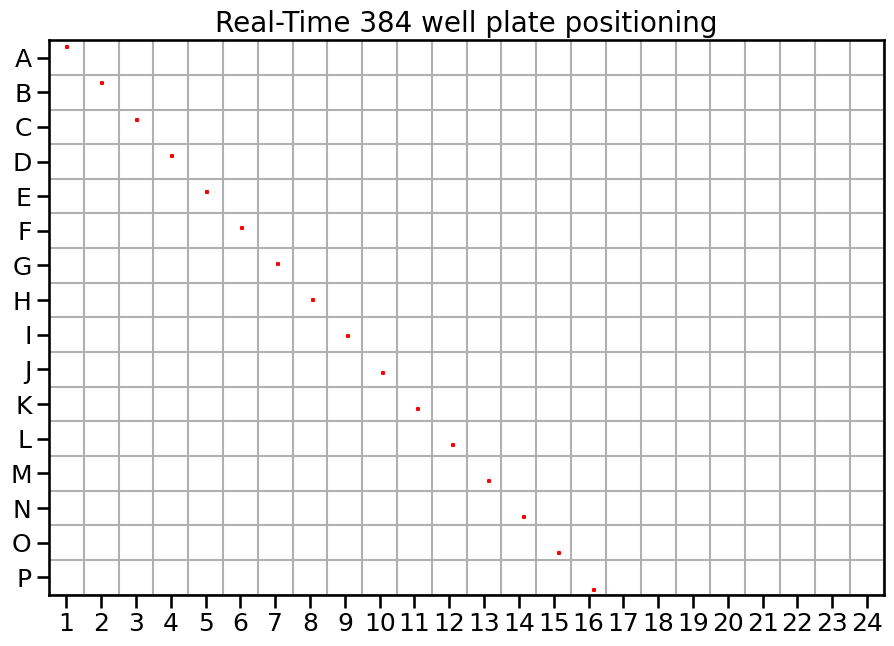

array([[ 4.6296082e+00,  4.6296043e+00,  4.6296043e+00,  4.6296062e+00,
         4.6296062e+00,  4.6296062e+00,  4.6296053e+00,  4.6296053e+00,
         4.6296058e+00,  4.6296058e+00,  4.6296058e+00,  4.6296058e+00,
         4.6296053e+00,  4.6296053e+00,  4.6296062e+00],
       [-4.7617722e+00, -4.7617722e+00, -4.7617702e+00, -4.7617731e+00,
        -4.7617712e+00, -4.7617717e+00, -4.7617722e+00, -4.7617717e+00,
        -4.7617722e+00, -4.7617712e+00, -4.7617722e+00, -4.7617722e+00,
        -4.7617722e+00, -4.7617722e+00, -4.7617722e+00],
       [-4.2015314e-04, -4.2021275e-04, -4.2021275e-04, -4.2015314e-04,
        -4.2021275e-04, -4.2021275e-04, -4.2015314e-04, -4.2021275e-04,
        -4.2021275e-04, -4.2015314e-04, -4.2021275e-04, -4.2021275e-04,
        -4.2021275e-04, -4.2015314e-04, -4.2021275e-04]], dtype=float32)

In [10]:
axis, tr, tl, bl, r_n, c_n, mid_point, vector_1,vector_2  = pv.create_plot(
)
import numpy as np

vectors = np.array(vectors, dtype=np.float32)
if len(vectors[0]) < 3:
    vectors = np.hstack((np.array(vectors, dtype=np.float32), np.zeros((len(vectors),1))))
    

for vector in np.hstack(vectors.reshape(r_n, c_n, 3).diagonal().reshape(3,16,1)):
    x,y,_ = vector
    
    axis.scatter(x,y, c="r", s=s*100, marker=",")
    
plt.show()

out = np.diff(vectors.reshape(r_n, c_n, 3).diagonal(), axis=-1)
out

## Get difference between positionings
12.06

In [28]:
#Get Vectors from the create_plot function or somewhere else

#vectors are in format: x,y,1
x,y,z = list(zip(*vectors))

out = np.gradient(np.array([x]).reshape(r_n, c_n, 1), axis=1) # Get difference for each row 
print("Min gradient: {} Max gradient: {} Axis: {}".format(np.min(out), np.max(out), "y"))

Min gradient: 4.629604339599609 Max gradient: 4.629608154296875 Axis: y


In [13]:
vectors[0]

array([-47.67996  ,  33.08609  ,   0.9995798], dtype=float32)

NameError: name 'ddx' is not defined

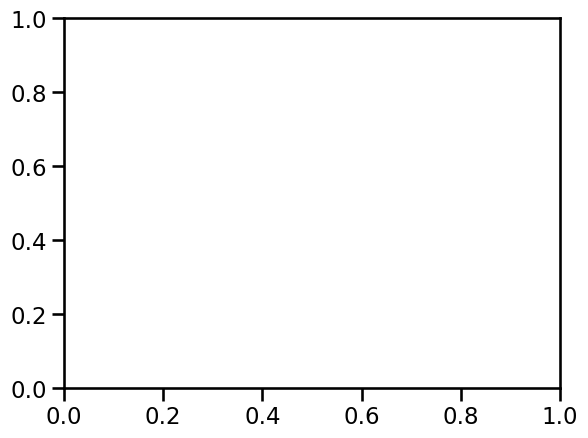

In [11]:
sns.set_context("talk")
x, y = list(zip(*vector_2))
fig, g = plt.subplots()

g.quiver(x, y,ddx,ddy, angles=("xy"), units="xy")
title = "Projection gradient from top corner"
g.set_title(title, fontsize="medium")
g.set_xlabel("x")
g.set_ylabel(r"y")

plt.tight_layout()
plt.savefig(os.path.join(save_dir, "{}.png".format(title)))




In [ ]:
sns.set_context("talk")
g = sns.regplot(data=data_df, y="Value", x="Autofocus_score") #N 120 imgs
title = "Correlation of subjective score and Brenner"
g.set_title(title, fontsize="medium")
g.set_xlabel("Subjective score")
g.set_ylabel(r"Brenner")
g.ticklabel_format(axis='y', useOffset=False, useMathText= True)
r, p = sp.stats.pearsonr(x=data_df["Autofocus_score"], y=data_df["Value"])
ax = plt.gca() # Get a matplotlib's axes instance
g.text(.05, .8, "Pearson's r ={:.2f}".format(r), transform=g.transAxes)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "{}.png".format(title)))

# Confirm autofocus dataframe

In [ ]:
import numpy as np

current = {'xposition': {'Value': '42.566100'}, 'yposition': {'Value': '-26.390500'}}
current_vect = np.array([current["xposition"]["Value"], current["yposition"]["Value"]])

target = {'xposition': {'Value': 42.56}, 'yposition': {'Value': -26.390}}
target_vect = np.array([target["xposition"]["Value"], target["yposition"]["Value"]])

np.all(current_vect.astype(float) != target_vect.astype(float))

In [ ]:
import glob
import pandas as pd
import os
from datetime import *
dfs_path = glob.glob("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/upload/2024-04-15/*/*.csv")
dfs = pd.concat([pd.read_csv(x).assign(Wellname=os.path.basename(os.path.dirname(x)).split("_")[-1]) for x in dfs_path if pd])
dfs["time"] = dfs["Img_ID"].apply(lambda x: datetime.strptime(x.split("Protocol 59_")[-1].split(".ims")[0], "%H.%M.%S").strftime("%H.%M.%S"))


In [ ]:
dfs.head()

In [ ]:
import seaborn as sns

sns.lineplot(data=dfs, x="Z plane", y="Value", hue="Well coords")

In [ ]:
from DragonFlyWellPlateAutomation.devices.image_based_autofocus import AutoFocus
from imaris_ims_file_reader.ims import ims
auto = AutoFocus()
img_path = "/media/ibrahim/Extended Storage/cloud/Internship/bioquant/upload/2024-04-15/H2B_monastrol_500um_day1_2024-04-15_Protocol 59_17.50.58.ims"

img = ims(img_path, squeeze_output=True)[0, :, 0].astype(float)  # time point, 
f = auto.Psw_mean(img=img, img_name="H2B_monastrol_500um_day1_2024-04-15_Protocol 59_17.50.58.ims")

In [3]:
from DragonFlyWellPlateAutomation.devices.image_based_autofocus import AutoFocus
from imaris_ims_file_reader.ims import ims
import glob
import pandas as pd
import os

bad_imgs = ["H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_21.34.58_F0.ims", "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_21.19.37_F0.ims",
           "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_20.56.37_F0.ims", "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_20.48.57_F0.ims",
           "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_20.33.34_F0.ims", "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_20.21.49_F0.ims",
           "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_20.14.11_F0.ims", "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_20.06.31_F0.ims",
           "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_19.58.53_F0.ims", "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_19.51.13_F0.ims",
            "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_19.43.34_F0.ims", "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_19.35.53_F0.ims",
           "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_19.28.13_F0.ims", "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_19.20.34_F0.ims",
           "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_18.42.14_F0.ims", "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_18.26.54_F0.ims", 
           "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_18.19.13_F0.ims", "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_18.03.54_F0.ims",
           "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_17.56.15_F0.ims", "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_17.38.32_F0.ims"]

mediocre_imgs = ["H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_21.58.03_F0.ims",
                 "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_21.50.21_F0.ims","H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_21.27.17_F0.ims",
                "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_21.04.16_F0.ims", "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_19.12.55_F0.ims",
                "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_18.57.34_F0.ims","H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_18.49.56_F0.ims",
                "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_18.34.34_F0.ims", "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_18.11.34_F0.ims"]

good_imgs = ["H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_21.42.39_F0.ims", "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_21.11.56_F0.ims",
             "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_20.41.15_F0.ims", "H2B_monastrol_500um_day1_2024-04-15_Hoechst_GFP_19.05.16_F0.ims"]

dt = pd.concat([pd.DataFrame({"Img_ID": bad_imgs, "quality": [3 for x in range(len(bad_imgs))],  "time": [x.split("Hoechst_GFP_")[-1].split("_F0.ims")[0] for x in bad_imgs]}), pd.DataFrame({"Img_ID": mediocre_imgs, "quality": [2 for x in range(len(mediocre_imgs))], "time": [x.split("Hoechst_GFP_")[-1].split("_F0.ims")[0] for x in mediocre_imgs]}),
     pd.DataFrame({"Img_ID": good_imgs, "quality": [1 for x in range(len(good_imgs))], "time": [x.split("Hoechst_GFP_")[-1].split("_F0.ims")[0] for x in good_imgs]})], ignore_index=True)

from datetime import *
duration = 440
dt["time"] = dt["time"].apply(lambda x: (datetime.strptime(x, "%H.%M.%S")).strftime("%H.%M.%S") if x != "" else x)


| Good | Blurry | Empty/Bad |
| --- | --- | --- |
| 4 | 9 | 20 |

## Visualize wells visited

In [ ]:
# Now visualise on coordinate plot method from publication
title = "Visited wells"
import  notebooks.plot_visualizer as pv
axis, tr, tl, bl, r_n, c_n, mid_points, v, v = pv.create_plot(title=title)
import matplotlib.pyplot as plt

wellnames = sum([[str(r + 1) + "-" + str(c + 1) for c in range(c_n)] for r in range(r_n)], [])
for vector, wellname in zip(mid_points, wellnames):
    #print("Well name {} and its coordinate: {}".format(wellname, vector))
    x,y = vector

    indxs = dfs["Wellname"].isin([wellname]).tolist()

    if True in indxs:
        axis.scatter(x,y, c="g", s=4.5**4.3, marker="s")
    else:
        axis.scatter(x,y, c="grey", s=4.5**4.3, marker="s")
    axis.text(x, y, wellname, ha='center', va='bottom',fontsize="xx-small")

plt.tight_layout()
plt.savefig(os.path.join(save_dir, "{}.png".format(title)))
plt.show()


## Visualize score of images

4.509090909166667
20.29090909125
x and y step: 4.583333333333333 and 4.5625
Ymin -39.0 and Ymax 34.0
Xmin -50.0 and Xmax 60.0


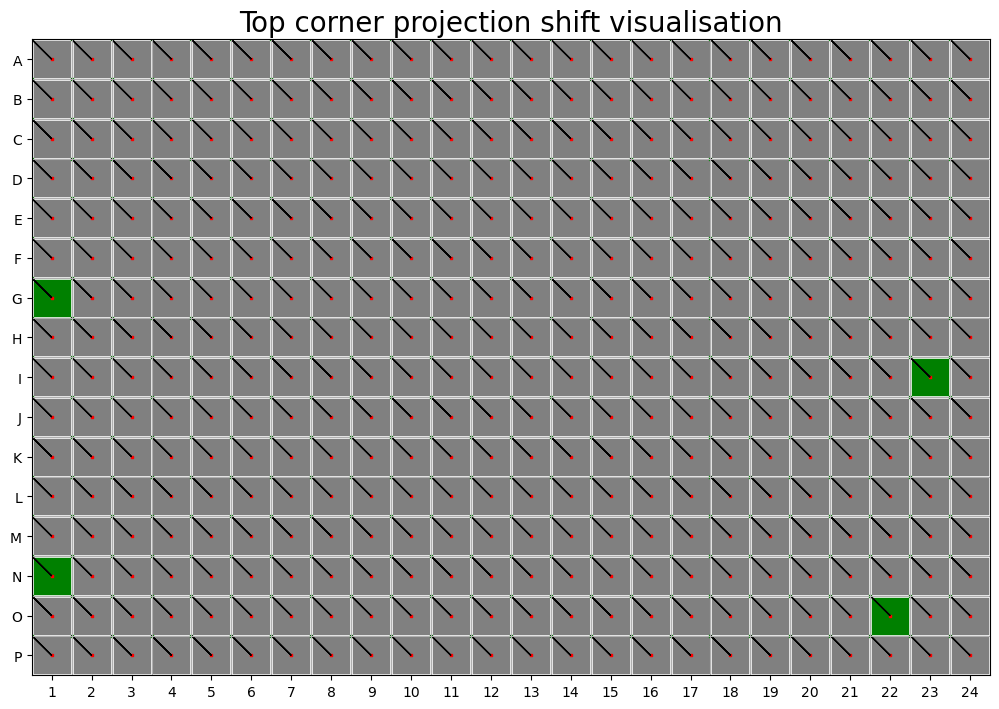

In [6]:
# Now visualise on coordinate plot method from publication
title = "Top corner projection shift visualisation"
import  plot_visualizer as pv
axis, tr, tl, bl, r_n, c_n, mid_points, vectors1, vectors2 = pv.create_plot(title=title)
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
dt = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")

wellnames = sum([[str(r + 1) + "-" + str(c + 1) for c in range(c_n)] for r in range(r_n)], [])

colors = ["g", "w", "r"]

for vector, wellname, corner in zip(mid_points, wellnames, vectors2):
    #print("Well name {} and its coordinate: {}".format(wellname, vector))
    x,y = vector

    indxs = dt[(dt["Well coords"] == wellname) & (dt["quality"] == 1)].index


    if indxs.tolist():
        axis.scatter(x,y, c="green", s=4.5**4.3, marker="s")
    else:
        axis.scatter(x,y, c="grey", s=4.5**4.3, marker="s")


    x,y, = vector
    dx,dy=x-corner[0], y-corner[1]
    distance = np.sqrt(dx**2 + dy**2)
    axis.scatter(x,y, c="r", s=4.5, marker="s")
    axis.scatter(*corner, c="g", s=4.5, marker="s")
    plt.arrow(*corner, dx, dy)
    

    #axis.text(x, y, wellname, ha='center', va='bottom',fontsize="xx-small")

plt.tight_layout()
#plt.savefig(os.path.join(save_dir, "{}.png".format(title)))
plt.show()

In [ ]:
dfs_merge

In [ ]:
import shutil
datadir = "/media/ibrahim/Extended Storage/cloud/Internship/bioquant/upload/2024-04-15"
save2dir= "/media/ibrahim/Extended Storage/cloud/Internship/bioquant/score_autofocus_imgs"
for img_path, wellname in dfs_merge[["Img_ID_x","Well coords"]].dropna().values:
    path = os.path.join(save2dir, wellname)
    if not os.path.exists(path):
        os.mkdir(path)
    shutil.copy(os.path.join(datadir, img_path), os.path.join(path, img_path))

In [ ]:
import pandas as pd
dfs_merge = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")

In [ ]:
dfs_merge

In [ ]:
import seaborn as sns
import scipy as sp
sns.set_context("talk")
g = sns.regplot(data=data_df, y="Value", x="Autofocus_score") #N 120 imgs
title = "Correlation of subjective score and Brenner"
g.set_title(title, fontsize="medium")
g.set_xlabel("Subjective score")
g.set_ylabel(r"Brenner")
g.ticklabel_format(axis='y', useOffset=False, useMathText= True)
r, p = sp.stats.pearsonr(x=data_df["Autofocus_score"], y=data_df["Value"])
ax = plt.gca() # Get a matplotlib's axes instance
g.text(.05, .8, "Pearson's r ={:.2f}".format(r), transform=g.transAxes)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "{}.png".format(title)))

## Get variance of each image

### Variance of autofocus stack

In [ ]:
import numpy as np
data = dfs_merge[dfs_merge["Estimated f"]==1]
g = sns.barplot(data=dfs_merge, x="quality", y="Autofocus_score") #No correlation with z hieght

In [ ]:
[dfs_merge[dfs_merge["quality"]==x]["Autofocus_score"].mean()/dfs_merge[dfs_merge["quality"]==1]["Autofocus_score"].mean() for x in [1,2,3]]

In [ ]:
import numpy as np
data = dfs_merge[dfs_merge["Estimated f"]==1]
g = sns.barplot(data=data, x="quality", y="Spectral_moments") #No correlation with z hieght

In [ ]:
[dfs_merge[dfs_merge["quality"]==x]["Spectral_moments"].mean()/dfs_merge[dfs_merge["quality"]==1]["Spectral_moments"].mean() for x in [1,2,3]]

In [ ]:
import numpy as np
#data = dfs_merge[dfs_merge["Estimated f"]==1]
g = sns.barplot(data=dfs_merge, x="quality", y="Value") #No correlation with z hieght

In [ ]:
[dfs_merge[dfs_merge["quality"]==x]["Value"].mean()/dfs_merge[dfs_merge["quality"]==1]["Value"].mean() for x in [1,2,3]]

In [ ]:
import numpy as np
data = dfs_merge[dfs_merge["Estimated f"]==1]
g = sns.barplot(data=data, x="quality", y="Variance") #No correlation with z hieght

In [ ]:
[dfs_merge[dfs_merge["quality"]==x]["Variance"].mean()/dfs_merge[dfs_merge["quality"]==1]["Variance"].mean() for x in [1,2,3]]

In [ ]:
v = pd.DataFrame({"Fold change": [dfs_merge[dfs_merge["quality"]==x]["Autofocus_score"].mean()/dfs_merge[dfs_merge["quality"]==1]["Autofocus_score"].mean() for x in [2,3]]+ 
[dfs_merge[dfs_merge["quality"]==x]["Spectral_moments"].mean()/dfs_merge[dfs_merge["quality"]==1]["Spectral_moments"].mean() for x in [2,3]] + 
[dfs_merge[dfs_merge["quality"]==x]["Value"].mean()/dfs_merge[dfs_merge["quality"]==1]["Value"].mean() for x in [2,3]] ,
"Metrics": ["Autofocus_score","Autofocus_score", "Spectral_moments","Spectral_moments", "Brenner", "Brenner"],
"Comparison": [2,3]*3 })

In [ ]:
#glue = v.pivot(index="Comparison", columns="Metrics", values="Fold change")
f = sns.barplot(v, x="Metrics", y="Fold change", hue="Comparison", palette=["white", "red"])
f.set_facecolor('grey')

In [ ]:
import numpy as np
sns.set_context("talk")
#dfs_merge["Value"] = dfs_merge["Value"] / dfs_merge["Value"].max() 
g = sns.barplot(data=dfs_merge, x="quality", y="Value", palette=["green", "white", "red"], errorbar="se")
title = "Brenner value per z stack quality class"
g.set_title(title)
g.set_xlabel("Quality class")
g.set_ylabel(r"Brenner value")
g.set_xticks([0,1,2],["Good", "Blurry", "Bad/Empty"])
g.set_facecolor('grey')
g.ticklabel_format(axis='y', useOffset=False, useMathText= True)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "{}.png".format(title)))

In [ ]:
import numpy as np
sns.set_context("talk")
#dfs_merge["Value"] = dfs_merge["Value"] / dfs_merge["Value"].max() 
g = sns.lineplot(data=dfs_merge[dfs_merge["Well coords"] == "2-22"], x="Z plane", y="Autofocus_score")
title = "Brenner value per z plane"
g.set_title(title)
g.set_xlabel("Quality class")
g.set_ylabel(r"Brenner value")
g.set_facecolor('grey')
g.ticklabel_format(axis='y', useOffset=False, useMathText= True)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "{}.png".format(title)))

In [ ]:
import numpy as np
sns.set_context("talk")
g = sns.barplot(data=dfs_merge, x="quality", y="Autofocus_score", palette=["green", "white", "red"], errorbar="se")
title = "Autofocus score per z stack quality class"
g.set_title(title)
g.set_xlabel("Quality class")
g.set_ylabel(r"Autofocus score")
g.set_xticks([0,1,2],["Good", "Blurry", "Bad/Empty"])
g.set_facecolor('grey')
g.ticklabel_format(axis='y', useOffset=False, useMathText= True)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "{}.png".format(title)))

In [ ]:
import numpy as np
sns.set_context("talk")
g = sns.barplot(data=dfs_merge, x="quality", y="Spectral_moments", palette=["green", "white", "red"], errorbar="se")
title = "Spectral score per z stack quality class"
g.set_title(title)
g.set_xlabel("Quality class")
g.set_ylabel(r"Spectral moments")
g.set_xticks([0,1,2],["Good", "Blurry", "Bad/Empty"])
g.set_facecolor('grey')
g.ticklabel_format(axis='y', useOffset=False, useMathText= True)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "{}.png".format(title)))

In [ ]:
import numpy as np
sns.set_context("talk")
g = sns.barplot(data=dfs_merge, x="quality", y="fmean", palette=["green", "white", "red"], errorbar="se")
title = "fmean score per z stack quality class"
g.set_title(title)
g.set_xlabel("Quality class")
g.set_ylabel(r"fmean score")
g.set_xticks([0,1,2],["Good", "Blurry", "Bad/Empty"])
g.set_facecolor('grey')
g.ticklabel_format(axis='y', useOffset=False, useMathText= True)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "{}.png".format(title)))

In [ ]:
[ data[data["quality"]==x]["Variance"].mean()/data[data["quality"]==1]["Variance"].mean() for x in [1,2,3]]

### Variance of Complex image

In [ ]:
sns.set_context("talk")
from imaris_ims_file_reader.ims import ims
dfs_merge["Variance_intensity_complex_img"] = dfs_merge["Img_ID_y"].dropna().apply(lambda x: np.var(ims(os.path.join(datadir,x), squeeze_output=True)[0, :, 0].astype(float))) 
g = sns.barplot(data=dfs_merge, x="quality", y="Variance_intensity_complex_img", palette=["green", "white", "red"], errorbar="se")
title = "Image variance per quality class"
g.set_title(title)
g.set_xlabel("Quality class")
g.set_ylabel(r"$I_{x,y}$ variance")
g.set_xticks([0,1,2],["Good", "Blurry", "Bad/Empty"])
g.set_facecolor('grey')
g.ticklabel_format(axis='y', useOffset=False, useMathText= True)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "{}.png".format(title)))

## Compute other IFEF

In [ ]:
from imaris_ims_file_reader.ims import ims
from DragonFlyWellPlateAutomation.devices.image_based_autofocus import AutoFocus
import pandas as pd
import os
dfs_merge = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")
datadir = "/media/ibrahim/Extended Storage/cloud/Internship/bioquant/upload/2024-04-15"
autofocus = AutoFocus()
dfs_merge["Variance"] = dfs_merge["Img_ID_x"].dropna().apply(lambda x: np.var(ims(os.path.join(datadir,x), squeeze_output=True)[0, :, 0].astype(float)))
dfs_merge["fmean"] = dfs_merge["Img_ID_x"].dropna().apply(lambda x: autofocus.Psw_mean(ims(os.path.join(datadir,x), squeeze_output=True)[0, :, 0].astype(float), img_name=x))
dfs_merge["fmeanbin"] = dfs_merge["Img_ID_x"].dropna().apply(lambda x: autofocus.Psw_mean(ims(os.path.join(datadir,x), squeeze_output=True)[0, :, 0].astype(float), img_name=x)) 
dfs_merge["fSTD"] = dfs_merge["Img_ID_x"].dropna().apply(lambda x: autofocus.Psw_std(ims(os.path.join(datadir,x), squeeze_output=True)[0, :, 0].astype(float), img_name=x)) 

In [ ]:
dfs_merge.to_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")

In [ ]:
import numpy as np
data = dfs_merge[dfs_merge["Estimated f"] == 1]
data = data.groupby("quality", as_index=False)["Z plane"].apply(np.std)
g = sns.barplot(data=data, x="quality", y="Z plane") #No correlation with z hieght

In [ ]:
dfs_merge["Spectral_moments"] = dfs_merge["Img_ID_x"].dropna().apply(lambda x: autofocus.Spectral_moments(ims(os.path.join(datadir,x), squeeze_output=True)[0, :, 0].astype(float), img_name=x))

In [ ]:
dfs_merge.to_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")

In [ ]:
f = ims(os.path.join(datadir,"H2B_monastrol_500um_day1_2024-04-15_Protocol 59_18.28.13.ims"))[0, :, 0].astype(float)

In [ ]:
dfs_merge_f = dfs_merge.copy()
dfs_merge_f["Spatialxygradient"] = dfs_merge_f["Spatialxygradient"].apply()
g = sns.barplot(data=dfs_merge, x="quality", y="Spatialxygradient") #No correlation with z hieght

In [ ]:
# z plane variance from minimum z plane

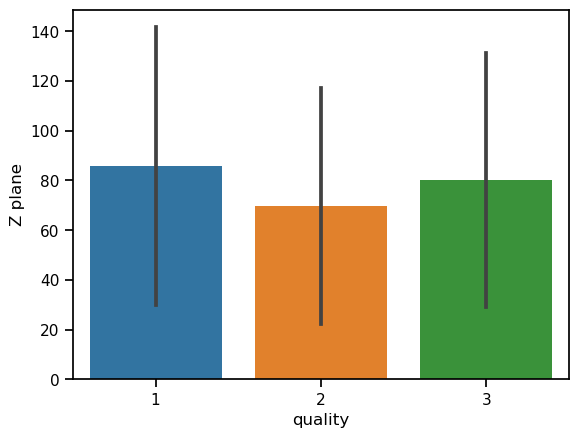

In [132]:
dfs_merge = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")
dfs_merge_f = dfs_merge.copy()
dfs_merge_f["Z plane"] = (dfs_merge_f["Z plane"] - dfs_merge_f["Z plane"].min()) 
dfs_merge_f = dfs_merge_f[dfs_merge_f["Estimated f"] == 1]
f  = dfs_merge_f.groupby("quality", as_index=False)["Z plane"].apply(np.std) 
g = sns.barplot(data=dfs_merge_f , x="quality", y="Z plane", errorbar="sd") #No correlation with z hieght

In [ ]:
dfs_merge = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")
dfs_merge_f = dfs_merge.copy()
dfs_merge_f["Z plane"] = (dfs_merge_f["Z plane"] - dfs_merge_f["Z plane"].min()) 
dfs_merge_f = dfs_merge_f[dfs_merge_f["Estimated f"] == 1]
f  = dfs_merge_f.groupby("quality", as_index=False)["Z plane"].apply(np.std) 
g = sns.barplot(data=dfs_merge_f , x="quality", y="Z plane", errorbar="sd") #No correlation with z hieght

# Visualize brenner scoresand corresponding subjective score
13.06

search for root_dir and set working directory
Working directory set to: /media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation
/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation
search for root_dir and set working directory
Working directory set to: /media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation
4.509090909166667
20.29090909125
x and y step: 4.666666666666667 and 4.6875
Ymin -40.0 and Ymax 35.0
Xmin -50.0 and Xmax 62.0


NameError: name 'os' is not defined

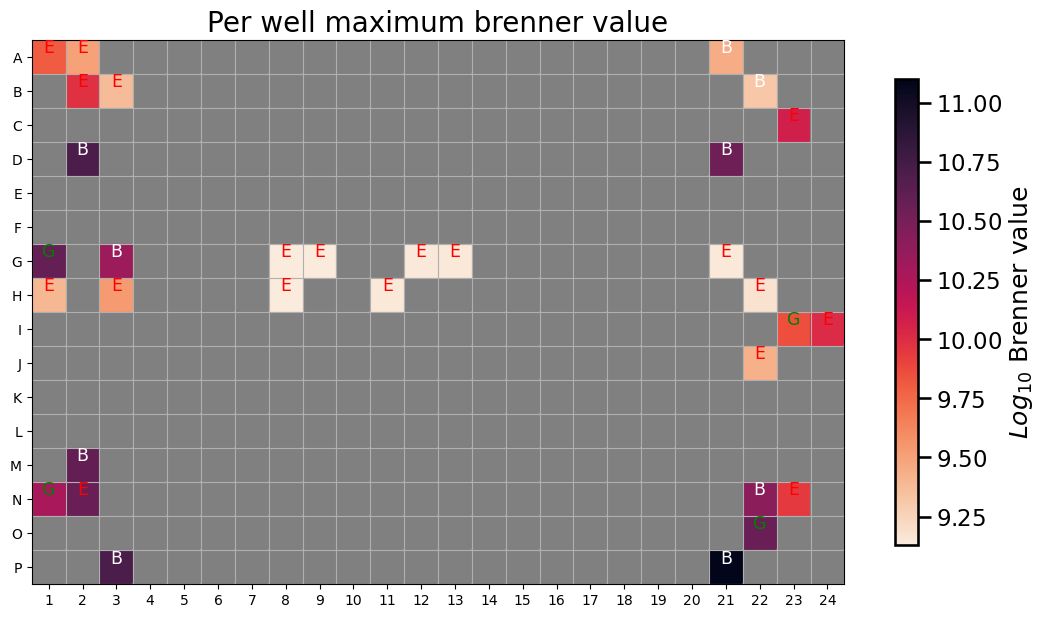

In [3]:
# Now visualise on coordinate plot method from publication
title = "Per well maximum brenner value"
import  plot_visualizer as pv
axis, tr, tl, bl, r_n, c_n, mid_points, vectors1, vectors2 = pv.create_plot(title=title)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns

sns.set_context("talk")
import pandas as pd
dt = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")

wellnames = sum([[str(r + 1) + "-" + str(c + 1) for c in range(c_n)] for r in range(r_n)], [])

subj_scores = ["G", "B", "E"]
colors = ["g", "w", "r"]

norm = mpl.colors.Normalize(vmin=np.log10(dt.loc[:, "Value"].min()), vmax=np.log10(dt.loc[:, "Value"].max()))

cmap = sns.cm.rocket_r


for vector, wellname, corner in zip(mid_points, wellnames, vectors2):
    #print("Well name {} and its coordinate: {}".format(wellname, vector))
    x,y = vector

    indxs = dt[(dt["Well coords"] == wellname)].index
    brenner_score = dt.loc[indxs, "Value"].max()
    subj_score =  dt[(dt["Well coords"] == wellname) & (dt["Value"] == brenner_score)]["quality"].values

    if subj_score.size > 0:
        subj_score = subj_score[0]
        axis.text(x, y, subj_scores[subj_score-1], ha='center', va='bottom',fontsize="x-small", color=colors[subj_score-1])
        
    
    
    if indxs.tolist():
        axis.scatter(x,y, c=np.log10(brenner_score), s=4.5**4.2, marker="s", cmap=cmap, vmin=np.log10(dt.loc[:, "Value"].min()), vmax=np.log10(dt.loc[:, "Value"].max()))
        
    else:
        axis.scatter(x,y, c="grey", s=4.5**4.2, marker="s")
    

    # x,y, = vector
    # dx,dy=x-corner[0], y-corner[1]
    # distance = np.sqrt(dx**2 + dy**2)
    # axis.scatter(x,y, c="r", s=4.5, marker="s")
    # axis.scatter(*corner, c="g", s=4.5, marker="s")
    # plt.arrow(*corner, dx, dy)
    


axis.figure.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axis, shrink=0.7, label="$Log_{10}$ Brenner value", format=mpl.ticker.ScalarFormatter(useMathText=True))
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "{}.png".format(title)))
plt.show()



## Normalized score comparison to classes
13.06

In [5]:
# Normalize the autofocus scores
dt = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")
dt_new = dt.copy()

normed_values=[]
categories = []
q_catogories = []
for c in ["Value", "Variance", "fmean", "fmeanbin", "fSTD", "Spectral_moments"]:
    out = dt[c]/dt[c].max()
    dt_new[c] = out
    s = dt.loc[out.index,"quality"] #.unique().tolist()
    normed_values += out.tolist() #[dt_new[dt.loc[out.index,"quality"]== x][c].mean() for x in s]
    q_catogories += s.tolist()
    if c == "Value":
        c = "Brenner"
    if c == "Spectral_moments":
        c = "SM"
    categories += ([c]*len(out))

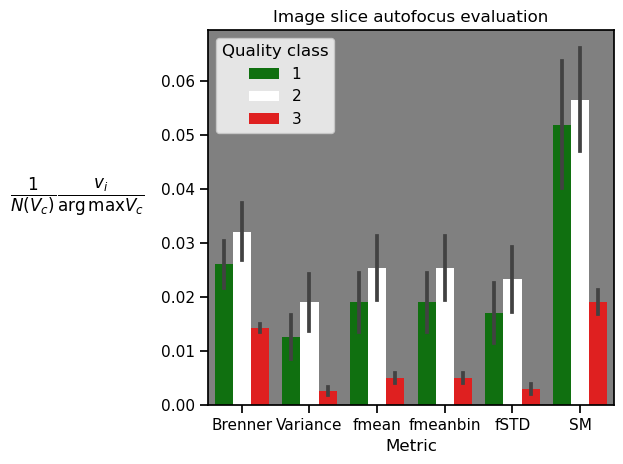

In [8]:
import os
sns.set_context("notebook")
save_dir = "/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures"
title = "Image slice autofocus evaluation"
dt_new_2 = pd.DataFrame({"Normed value": normed_values, "Metric": categories, "Quality class": q_catogories})
g = sns.barplot(data=dt_new_2, x="Metric", y="Normed value", hue="Quality class", palette=["g", "w", "r"], errorbar="se")
g.set_facecolor('grey')
g.set_title(title)
g.set_ylabel(r"$\frac{1}{N(V_{c})}\frac{v_{i}}{\arg\max V_{c}}$", rotation=360, size="x-large", labelpad=60)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "{}.png".format(title)))

(array([186.,  21.,   5.,  17.,   0.,   3.,   2.,   5.,   0.,   1.]),
 array([6.76225000e+03, 2.41158684e+09, 4.82316692e+09, 7.23474700e+09,
        9.64632708e+09, 1.20579072e+10, 1.44694872e+10, 1.68810673e+10,
        1.92926474e+10, 2.17042275e+10, 2.41158076e+10]),
 <BarContainer object of 10 artists>)

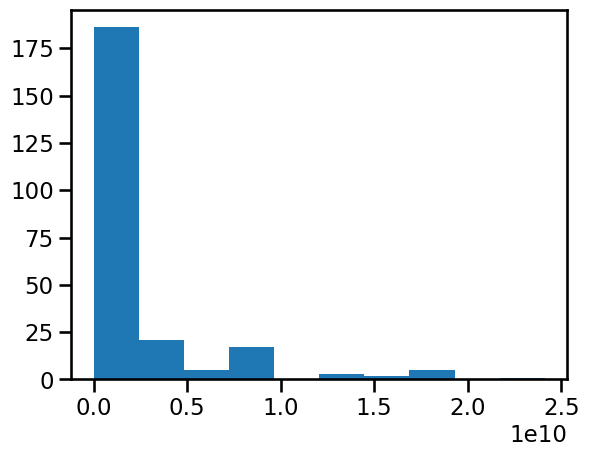

In [16]:
# Normalize the autofocus scores
dt_new = dt.copy()

normed_values=[]
categories = []
q_catogories = []
for c in ["Value", "Variance", "fmean", "fmeanbin", "fSTD", "Spectral_moments"]:
    out = dt[c]/dt[c].max()
    s = dt["Autofocus_score"].dropna() #.unique().tolist()
    print(s.index)
    outi = out[s.index].tolist()
    normed_values += outi #[dt_new[dt.loc[out.index,"quality"]== x][c].mean() for x in s]
    q_catogories += s.tolist()
    if c == "Value":
        c = "Brenner"
    if c == "Spectral_moments":
        c = "SM"
    categories += ([c]*len(outi))

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959],
      dtype='int64', length=360)
Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959],
      dtype='int64', length=360)
Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959],
      dtype='int64', length=360)
Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959],
      dtype='int64', length=360)
Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959],
      dtype='int64', length=360)
Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959],
      dtype='int64', length=360)


/home/ibrahim/miniconda3/envs/bioquant/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


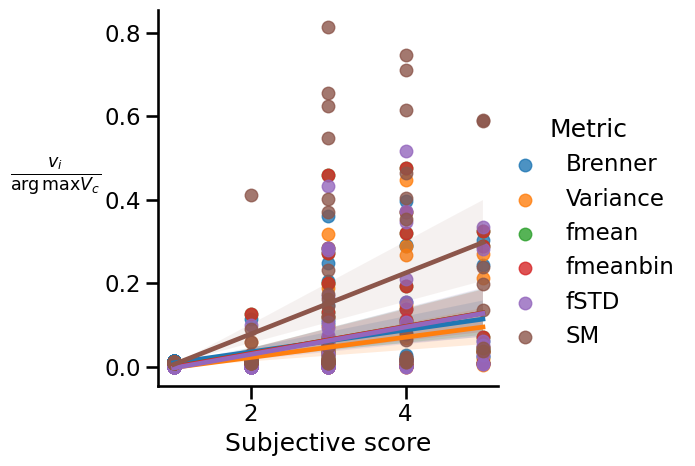

In [32]:
sns.set_context("talk")

dt = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")
title = "Quality class 1 autofocus-subjective score correlation"
dt_new_2 = pd.DataFrame({"Normed value": normed_values, "Metric": categories, "Autofocus score": q_catogories})

#dt_new_2 = dt_new_2.pivot(index="Metric", columns="Autofocus_score", values="Normed value")# In wide format
g = sns.lmplot(data=dt_new_2, x="Autofocus score", y="Normed value", hue="Metric", x_ci="sd")
for ax in g.axes.flat:
    ax.collections[-1].set_alpha(0.08)

plt.ylabel(r"$\frac{v_{i}}{\arg\max V_{c}}$", rotation=360, size="medium", labelpad=35)
plt.xlabel("Subjective score")
plt.savefig(os.path.join("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures", "{}.png".format(title)))

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import pandas as pd

4.509090909166667
20.29090909125
x and y step: 4.583333333333333 and 4.5625
Ymin -39.0 and Ymax 34.0
Xmin -50.0 and Xmax 60.0


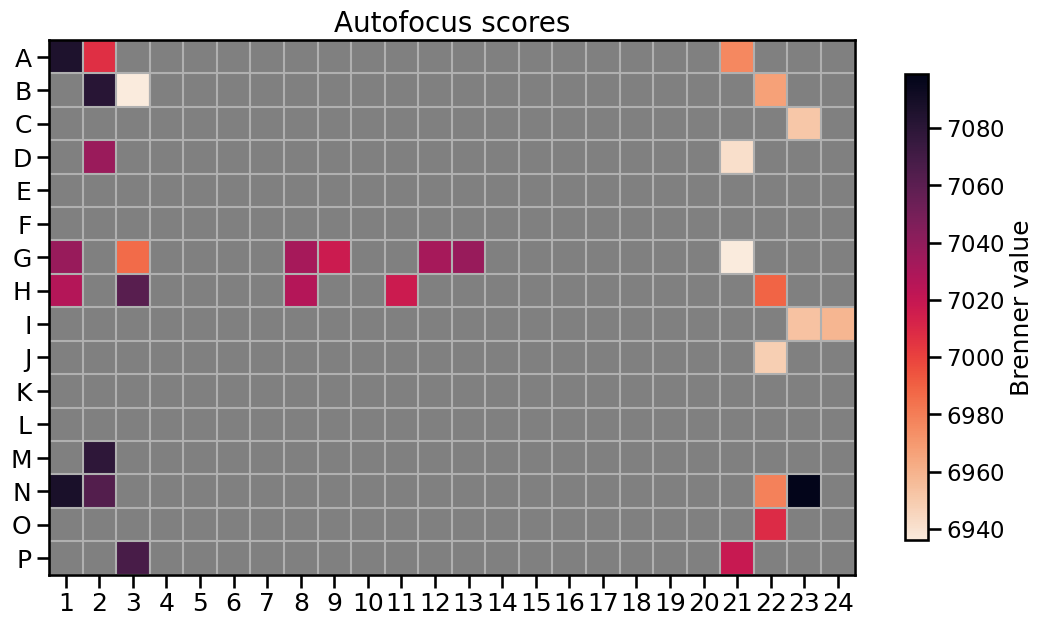

In [14]:
# Now visualise on coordinate plot method from publication
title = "Autofocus scores"
import  plot_visualizer as pv
axis, tr, tl, bl, r_n, c_n, mid_points, vectors1, vectors2 = pv.create_plot(title=title)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import os

sns.set_context("talk")
import pandas as pd
dt = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")

wellnames = sum([[str(r + 1) + "-" + str(c + 1) for c in range(c_n)] for r in range(r_n)], [])

subj_scores = ["G", "B", "E"]
colors = ["g", "w", "r"]

norm = mpl.colors.Normalize(vmin=dt.loc[:, "Z plane"].min(), vmax=dt.loc[:, "Z plane"].max())
vmin=dt.loc[:, "Z plane"].min()
vmax=dt.loc[:, "Z plane"].max()
cmap = sns.cm.rocket_r


for vector, wellname, corner in zip(mid_points, wellnames, vectors2):
    #print("Well name {} and its coordinate: {}".format(wellname, vector))
    x,y = vector

    indxs = dt[(dt["Well coords"] == wellname)].index
    dt_ = dt.loc[indxs, :]
    brenner_score = dt_[dt_["Estimated f"] == 1]["Z plane"].values
    if len(brenner_score) > 1:
        print("problems !!")
    elif len(brenner_score) == 1:
        brenner_score = brenner_score[0]

    
    
    if indxs.tolist():
        axis.scatter(x,y, c=brenner_score, s=4.5**4.2, marker="s", cmap=cmap, vmin=vmin, vmax=vmax)
        
    else:
        axis.scatter(x,y, c="grey", s=4.5**4.2, marker="s")
    

    # x,y, = vector
    # dx,dy=x-corner[0], y-corner[1]
    # distance = np.sqrt(dx**2 + dy**2)
    # axis.scatter(x,y, c="r", s=4.5, marker="s")
    # axis.scatter(*corner, c="g", s=4.5, marker="s")
    # plt.arrow(*corner, dx, dy)
    


axis.figure.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axis, shrink=0.7, label="Brenner value", format=mpl.ticker.ScalarFormatter(useMathText=True))
plt.tight_layout()
#plt.savefig(os.path.join(save_dir, "{}.png".format(title)))
plt.show()



## Good

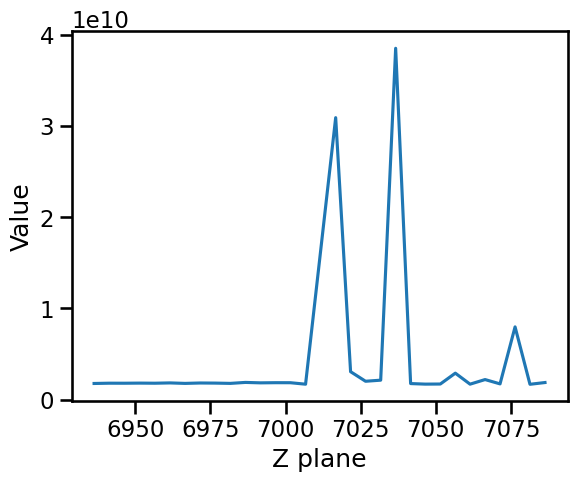

In [80]:
dfs_merge = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")
dfs_merge_f = dfs_merge[dfs_merge["Well coords"]=="7-1"]
dfs_merge_f = dfs_merge_f.sort_values(by=["Z plane"])
g = sns.lineplot(data=dfs_merge_f , x="Z plane", y="Value", errorbar="sd") #No correlation with z hieght


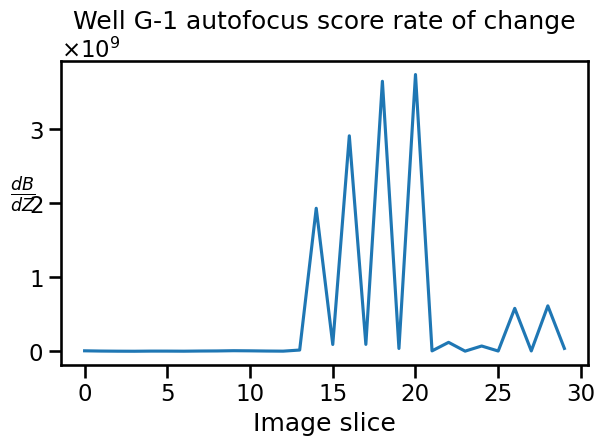

In [200]:
data_1 = np.gradient(dfs_merge_f["Value"].to_numpy())
data_2 = np.gradient(dfs_merge_f["Z plane"].to_numpy())
sns.set_context("talk")
plt.plot(np.abs(data_1/data_2))
plt.xlabel("Image slice")
plt.ylabel(r"$\frac{dB}{dZ}$", rotation=360 )
plt.ticklabel_format(axis='y', useOffset=False, useMathText= True)

plt.title("Well G-1 autofocus score rate of change")
plt.tight_layout()
plt.savefig("Well_G_1_autofocus_ rate_ of_change")

In [ ]:
import scipy.stats.norm

In [202]:
np.log10(np.abs(data_1/data_2).min())

5.200323894584892

## Good

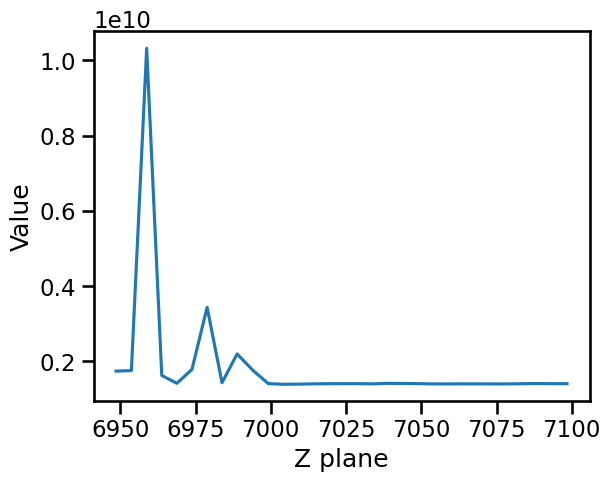

In [53]:
dfs_merge = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")
dfs_merge_f = dfs_merge[dfs_merge["Well coords"]=="9-24"]
dfs_merge_f = dfs_merge_f.sort_values(by=["Z plane"])
g = sns.lineplot(data=dfs_merge_f , x="Z plane", y="Value", errorbar="sd") #No correlation with z hieght

475746.5


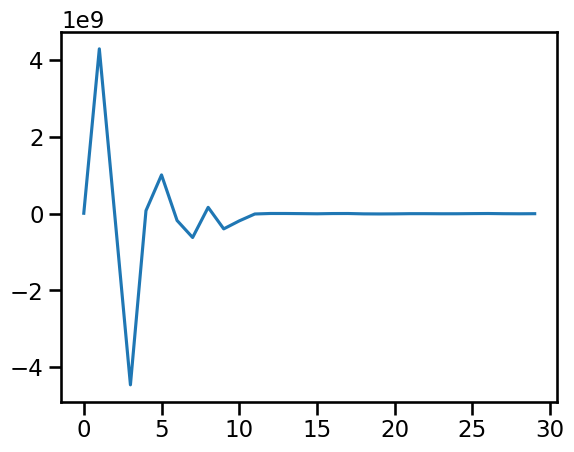

In [54]:
data = np.gradient(dfs_merge_f["Value"].to_numpy())
print(np.median(data))
plt.plot(data)

## Good

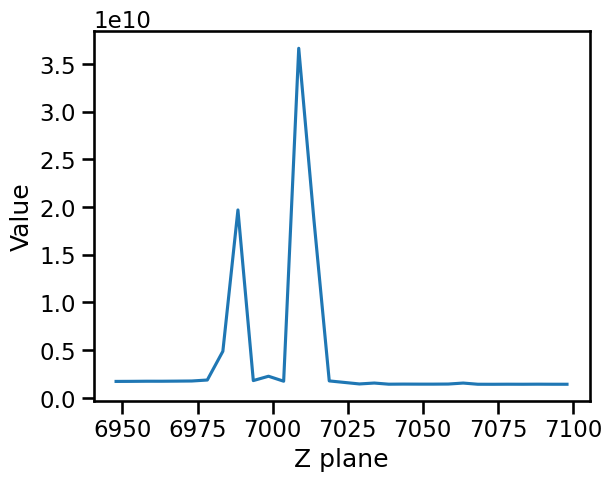

In [55]:
dfs_merge = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")
dfs_merge_f = dfs_merge[dfs_merge["Well coords"]=="15-22"]
dfs_merge_f = dfs_merge_f.sort_values(by=["Z plane"])
g = sns.lineplot(data=dfs_merge_f , x="Z plane", y="Value", errorbar="sd") #No correlation with z hieght

1486495.25


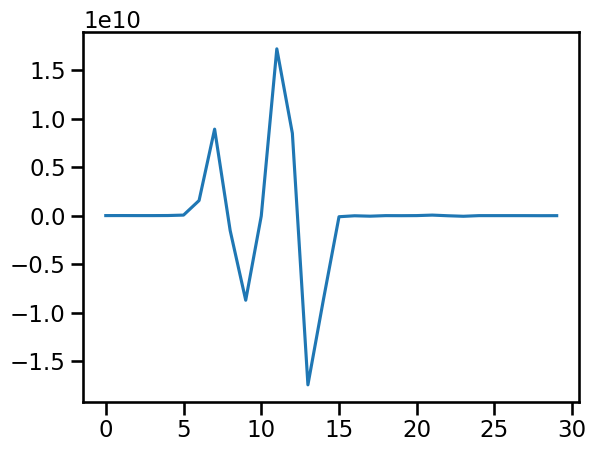

In [56]:
data = np.gradient(dfs_merge_f["Value"].to_numpy())
print(np.median(data))
plt.plot(data)

## Blurry

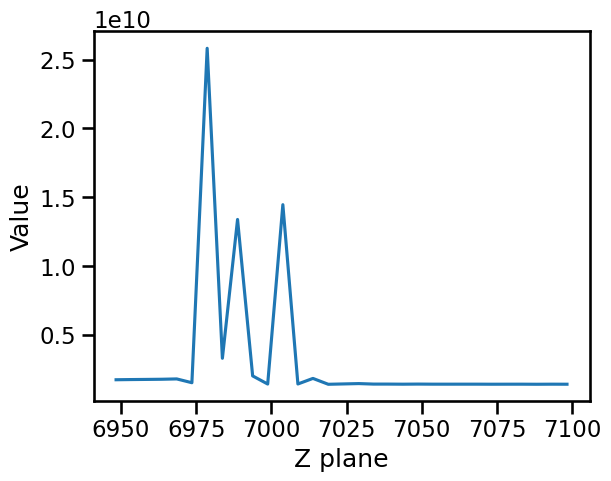

In [57]:
dfs_merge = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")
dfs_merge_f = dfs_merge[dfs_merge["Well coords"]=="14-22"]
dfs_merge_f = dfs_merge_f.sort_values(by=["Z plane"])
g = sns.lineplot(data=dfs_merge_f , x="Z plane", y="Value", errorbar="sd") #No correlation with z hieght

83518.75


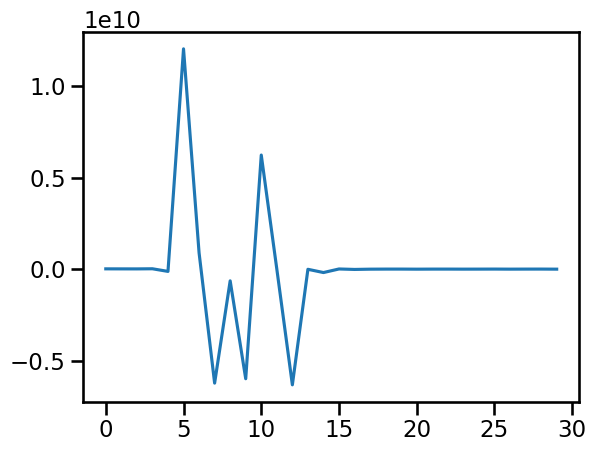

In [58]:
data = np.gradient(dfs_merge_f["Value"].to_numpy())
print(np.median(data))
plt.plot(data)

## Blurry

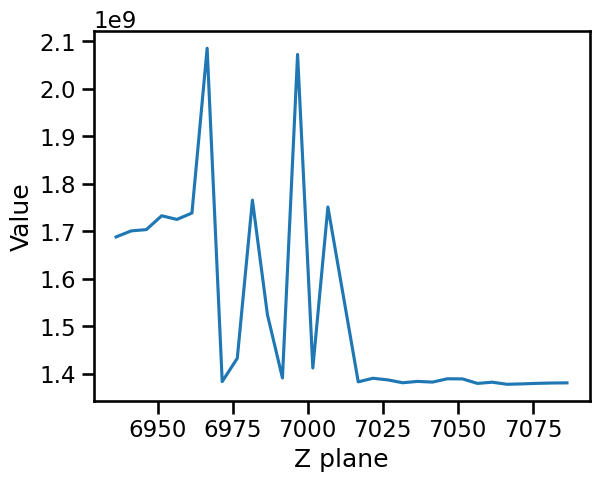

In [59]:
dfs_merge = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")
dfs_merge_f = dfs_merge[dfs_merge["Well coords"]=="2-22"]
dfs_merge_f = dfs_merge_f.sort_values(by=["Z plane"])
g = sns.lineplot(data=dfs_merge_f , x="Z plane", y="Value", errorbar="sd") #No correlation with z hieght

799928.0


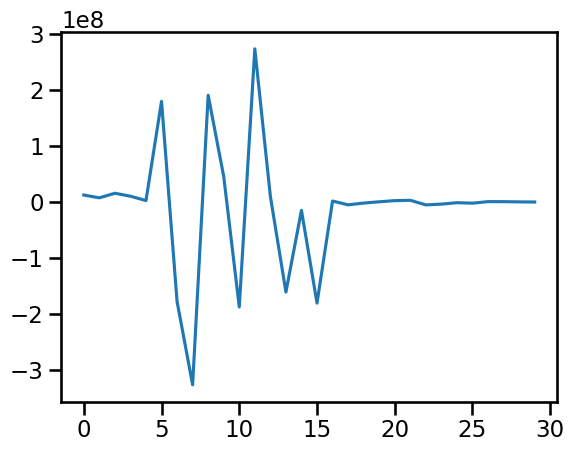

In [60]:
data = np.gradient(dfs_merge_f["Value"].to_numpy())
print(np.median(data))
plt.plot(data)

## Blurry

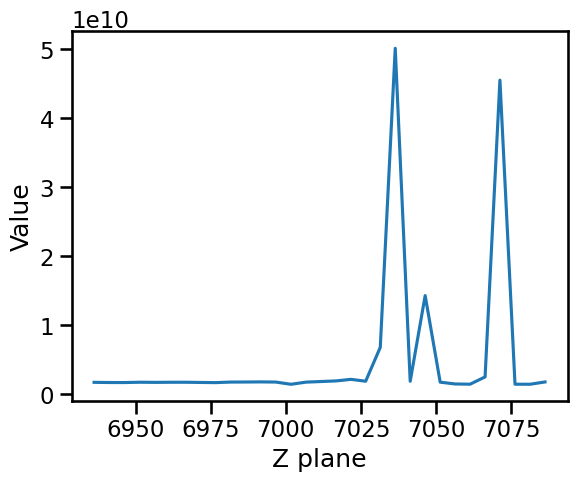

In [61]:
dfs_merge = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")
dfs_merge_f = dfs_merge[dfs_merge["Well coords"]=="4-2"]
dfs_merge_f = dfs_merge_f.sort_values(by=["Z plane"])
g = sns.lineplot(data=dfs_merge_f , x="Z plane", y="Value", errorbar="sd") #No correlation with z hieght

-3097081.0


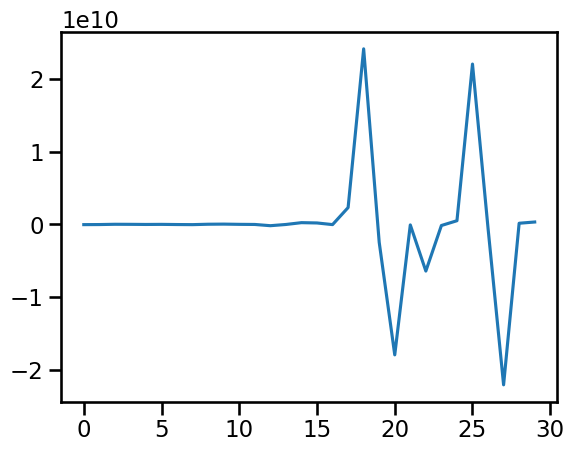

In [62]:
data = np.gradient(dfs_merge_f["Value"].to_numpy())
print(np.median(data))
plt.plot(data)

## Empty

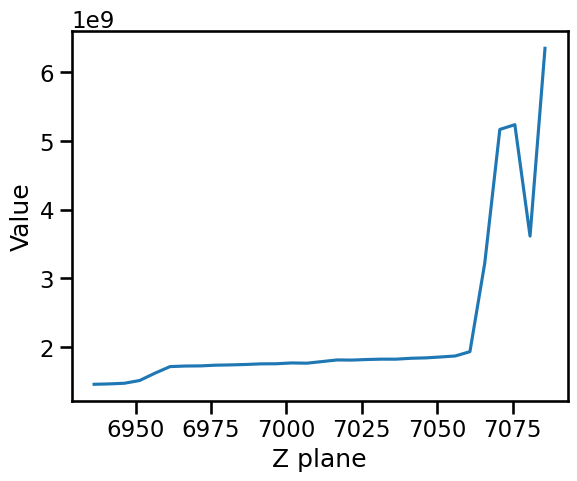

In [72]:
dfs_merge = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")
dfs_merge_f = dfs_merge[dfs_merge["Well coords"]=="1-1"]
dfs_merge_f = dfs_merge_f.sort_values(by=["Z plane"])
g = sns.lineplot(data=dfs_merge_f , x="Z plane", y="Value", errorbar="sd") #No correlation with z hieght

7.5


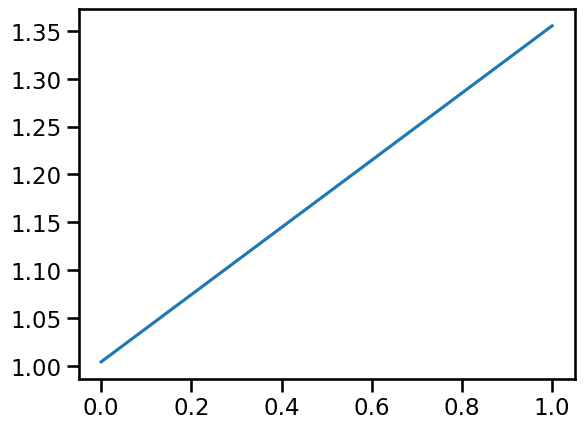

In [79]:
data = np.gradient(dfs_merge_f[["Z plane", "Value"]].to_numpy(), axis=-2)
print(np.median(data))

plt.plot(data[1]/data[0])

## Empty

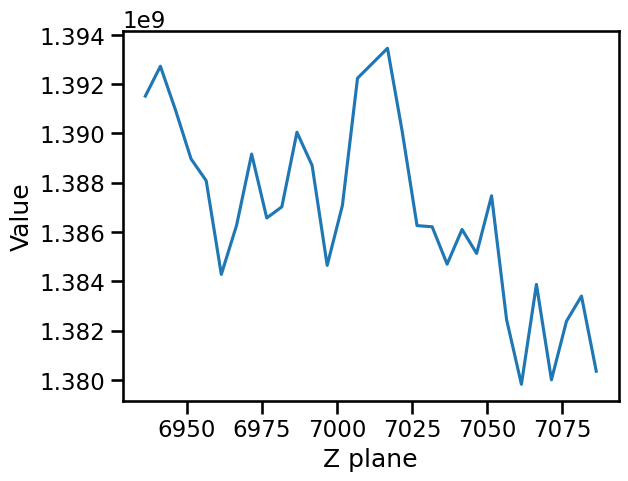

In [66]:
dfs_merge = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")
dfs_merge_f = dfs_merge[dfs_merge["Well coords"]=="8-11"]
dfs_merge_f = dfs_merge_f.sort_values(by=["Z plane"])
g = sns.lineplot(data=dfs_merge_f , x="Z plane", y="Value", errorbar="sd") #No correlation with z hieght

-765432.75


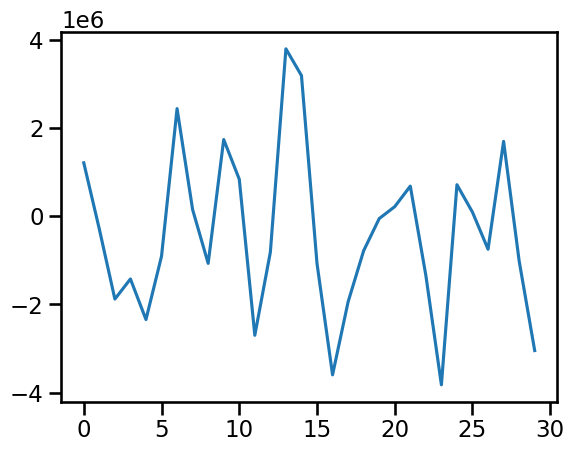

In [67]:
data = np.gradient(dfs_merge_f["Value"].to_numpy())
print(np.median(data))
plt.plot(data)

### Empty

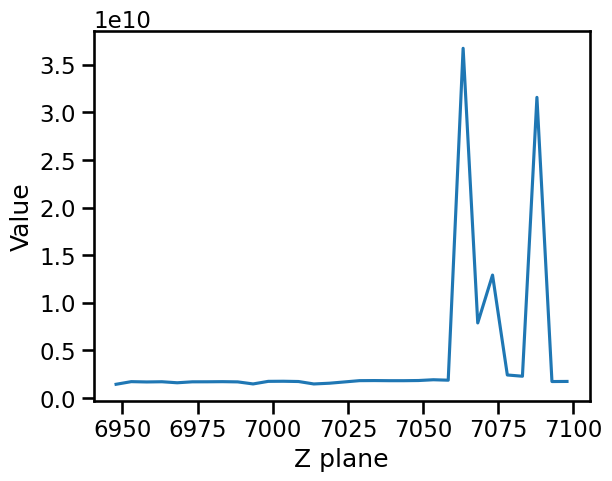

In [225]:
dfs_merge = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")
dfs_merge_f = dfs_merge[dfs_merge["Well coords"]=="14-2"]
dfs_merge_f = dfs_merge_f.sort_values(by=["Z plane"])
g = sns.lineplot(data=dfs_merge_f , x="Z plane", y="Value", errorbar="sd") #No correlation with z hieght

3411967.5


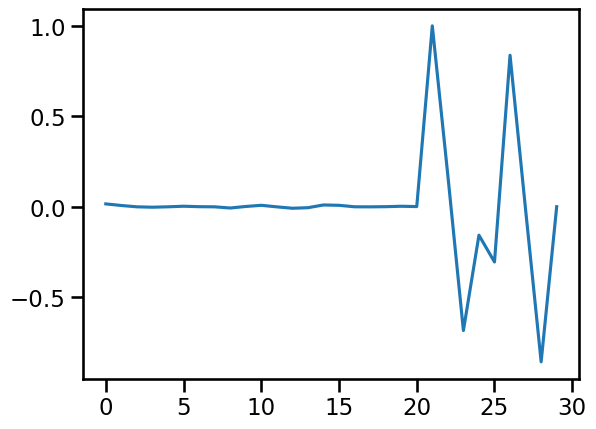

In [268]:
data = np.gradient(dfs_merge_f["Value"].to_numpy())
print(np.median(data))
plt.plot(data/np.max(data))

## Number of image slices per class with 0 rate of change

In [227]:
dfs_merge = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")



class_1 = dfs_merge[dfs_merge["quality"]==1]
wellcoords_class1 = class_1["Well coords"].dropna().unique()

class_2 = dfs_merge[dfs_merge["quality"]==2]
wellcoords_class2 = class_2["Well coords"].dropna().unique()

class_3 = dfs_merge[dfs_merge["quality"]==3]
wellcoords_class3 = class_3["Well coords"].dropna().unique()

8.62130985454152

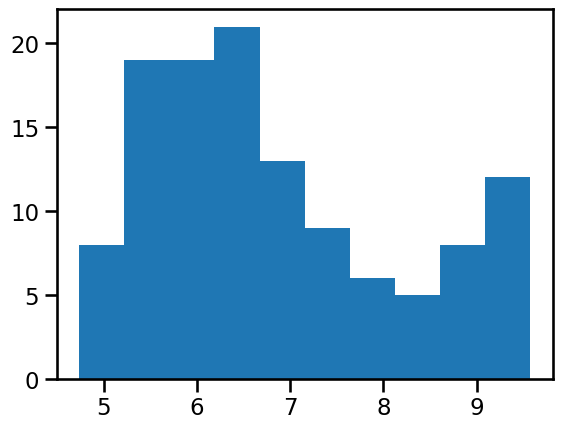

In [262]:



class_1_Zvalues = [np.gradient(class_1[class_1["Well coords"] == x].sort_values(by=["Z plane"])["Z plane"].to_numpy()) for x in wellcoords_class1]

class_1_Bvalues = [np.gradient(class_1[class_1["Well coords"] == x].sort_values(by=["Z plane"])["Value"].to_numpy()) for x in wellcoords_class1]

class_1_gradients = [x1/x2 for x1,x2 in zip(class_1_Bvalues,class_1_Zvalues)]

counts, bins = np.histogram(np.log10(np.abs(class_1_gradients)))
plt.hist(bins[:-1], bins, weights=counts)
np.std(np.log10(np.abs(class_1_gradients)))
np.log10(np.std(class_1_gradients, ddof=1)/np.sqrt(len(class_1_gradients)))

In [243]:
bins[np.argmax(counts)]

54717.84989858194

8.685439511710548

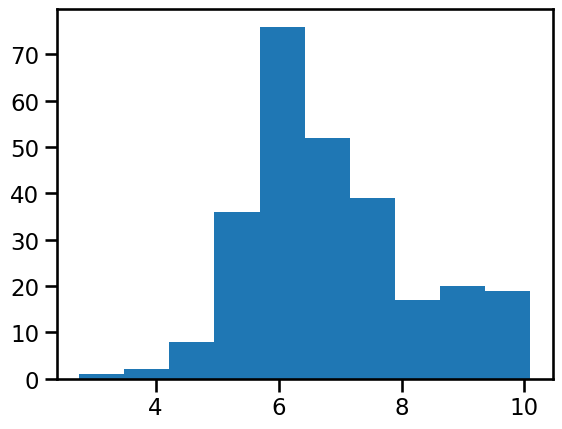

In [260]:
class_1_Zvalues = [np.gradient(class_2[class_2["Well coords"] == x].sort_values(by=["Z plane"])["Z plane"].to_numpy()) for x in wellcoords_class2]

class_1_Bvalues = [np.gradient(class_2[class_2["Well coords"] == x].sort_values(by=["Z plane"])["Value"].to_numpy()) for x in wellcoords_class2]

class_1_gradients = [x1/x2 for x1,x2 in zip(class_1_Bvalues,class_1_Zvalues)]

counts, bins = np.histogram(np.log10(np.abs(class_1_gradients)))
plt.hist(bins[:-1], bins, weights=counts)

np.std(np.log10(np.abs(class_1_gradients)))
np.log10(np.std(class_1_gradients, ddof=1)/np.sqrt(len(class_1_gradients)))

In [263]:
class_1_Zvalues = [np.gradient(class_3[class_3["Well coords"] == x].sort_values(by=["Z plane"])["Z plane"].to_numpy()) for x in wellcoords_class3]

class_1_Bvalues = [np.gradient(class_3[class_3["Well coords"] == x].sort_values(by=["Z plane"])["Value"].to_numpy()) for x in wellcoords_class3]

class_1_gradients = [x1/x2 for x1,x2 in zip(class_1_Bvalues,class_1_Zvalues)]

counts, bins = np.histogram(np.log10(class_1_gradients))
plt.hist(bins[:-1], bins, weights=counts)

bins[np.argmax(counts)]

plt.xlabel("Image slice")
plt.ylabel(r"$\frac{dB}{dZ}$", rotation=360 )
plt.ticklabel_format(axis='y', useOffset=False, useMathText= True)

plt.title("Well G-1 autofocus score rate of change")
plt.tight_layout()
plt.savefig("Well_G_1_autofocus_ rate_ of_change")

np.var(class_1_gradients)

np.log10(np.std(class_1_gradients, ddof=1)/np.sqrt(len(class_1_gradients)))

/tmp/ipykernel_1889175/1742028260.py:7: RuntimeWarning: invalid value encountered in log10
  counts, bins = np.histogram(np.log10(class_1_gradients))


ValueError: autodetected range of [nan, nan] is not finite

In [241]:



np.log10([291053312.24289274, 1451292745.3982065, 832765467.5060662])

array([8.46397255, 9.16175502, 8.92052271])

In [181]:
np.abs(np.gradient(class_1_Bvalues)).min()

1578.75

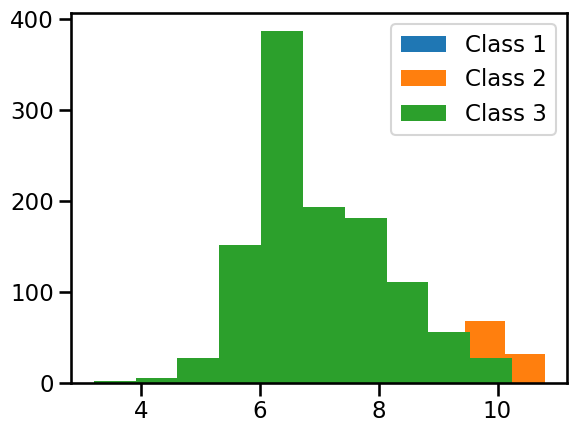

In [185]:
class_1_Zvalues = [np.gradient(class_1[class_1["Well coords"] == x].sort_values(by=["Z plane"])["Z plane"].to_numpy()) for x in wellcoords_class1]

class_1_Bvalues = [np.gradient(class_1[class_1["Well coords"] == x].sort_values(by=["Z plane"])["Value"].to_numpy()) for x in wellcoords_class1]

class_1_gradients = [x1/x2 for x1,x2 in zip(class_1_Bvalues,class_1_Zvalues)]

counts, bins = np.histogram(np.log10(np.abs(np.gradient(class_1_Bvalues))))
plt.hist(bins[:-1], bins, weights=counts, label="Class 1")

class_1_Zvalues = [np.gradient(class_2[class_2["Well coords"] == x].sort_values(by=["Z plane"])["Z plane"].to_numpy()) for x in wellcoords_class2]

class_1_Bvalues = [np.gradient(class_2[class_2["Well coords"] == x].sort_values(by=["Z plane"])["Value"].to_numpy()) for x in wellcoords_class2]

class_1_gradients = [x1/x2 for x1,x2 in zip(class_1_Bvalues,class_1_Zvalues)]

counts, bins = np.histogram(np.log10(np.abs(np.gradient(class_1_Bvalues))))
plt.hist(bins[:-1], bins, weights=counts, label="Class 2")


class_1_Zvalues = [np.gradient(class_3[class_3["Well coords"] == x].sort_values(by=["Z plane"])["Z plane"].to_numpy()) for x in wellcoords_class3]

class_1_Bvalues = [np.gradient(class_3[class_3["Well coords"] == x].sort_values(by=["Z plane"])["Value"].to_numpy()) for x in wellcoords_class3]

class_1_gradients = [x1/x2 for x1,x2 in zip(class_1_Bvalues,class_1_Zvalues)]

counts, bins = np.histogram(np.log10(np.abs(np.gradient(class_1_Bvalues))))
plt.hist(bins[:-1], bins, weights=counts, label="Class 3")

plt.legend()


In [213]:
dfs_merge = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")



class_1 = dfs_merge[dfs_merge["quality"]==1]
wellcoords_class1 = class_1["Well coords"].dropna().unique()

print(len(wellcoords_class1) )

4


In [214]:
len(dfs_merge["Well coords"].dropna().unique())

32

### Average brenner value per class

In [284]:
dfs_merge = pd.read_csv("/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/figures/dt.csv")


class_1 = dfs_merge[dfs_merge["quality"]==1]["Value"].mean()
class_2 = dfs_merge[dfs_merge["quality"]==2]["Value"].mean()
class_3 = dfs_merge[dfs_merge["quality"]==3]["Value"].mean()

print("Good: {} Blurry: {} Empty: {}".format(class_1, class_2, class_3))

Good: 3281979548.85 Blurry: 4044466160.6703706 Empty: 1801343609.8473685


In [276]:
(dfs_merge["Z plane"].min() - dfs_merge["Z plane"].max())/5

-32.57600000000002

In [278]:

well_coords = dfs_merge["Well coords"].dropna().unique()
np.std([dfs_merge[dfs_merge["Well coords"] == x]["Z plane"].min() for x in well_coords])

5.842484722647977

In [279]:
well_coords = dfs_merge["Well coords"].dropna().unique()
np.std([dfs_merge[dfs_merge["Well coords"] == x]["Z plane"].max() for x in well_coords])

5.811092302657024

## Average minimum  and maximum z-plane per class

In [298]:
class_1 = dfs_merge[dfs_merge["quality"]==1]
class_2 = dfs_merge[dfs_merge["quality"]==2]
class_3 = dfs_merge[dfs_merge["quality"]==3]

well_coords_ = class_1["Well coords"].dropna().unique()
np.mean([class_1[class_1["Well coords"] == x]["Z plane"].min() for x in well_coords_])

6945.1900000000005

In [299]:
class_1["Z plane"].min()

6936.28

In [292]:
well_coords_ = class_2["Well coords"].dropna().unique()
np.mean([class_2[class_2["Well coords"] == x]["Z plane"].min() for x in well_coords_])

6941.473333333333

In [300]:
class_2["Z plane"].min()

6936.14

In [293]:
np.mean([class_2[class_2["Well coords"] == x]["Z plane"].max() for x in well_coords_])

7091.591111111111

In [294]:
well_coords_ = class_3["Well coords"].dropna().unique()
np.mean([class_3[class_3["Well coords"] == x]["Z plane"].min() for x in well_coords_])

6939.349473684209

In [295]:
np.mean([class_3[class_3["Well coords"] == x]["Z plane"].max() for x in well_coords_])

7089.434736842104

In [301]:
class_3["Z plane"].min()

6935.94

In [297]:
import scipy

scipy.stats.ttest_ind(class_2["Z plane"].dropna().to_numpy(),class_3["Z plane"].dropna().to_numpy())
scipy.stats.ttest_ind(class_2["Z plane"].dropna().to_numpy(),class_3["Z plane"].dropna().to_numpy())

Ttest_indResult(statistic=0.6280422272279125, pvalue=0.5301473902654487)

In [45]:
"474.23".isnumeric()

False